<IPython.core.display.Javascript object>


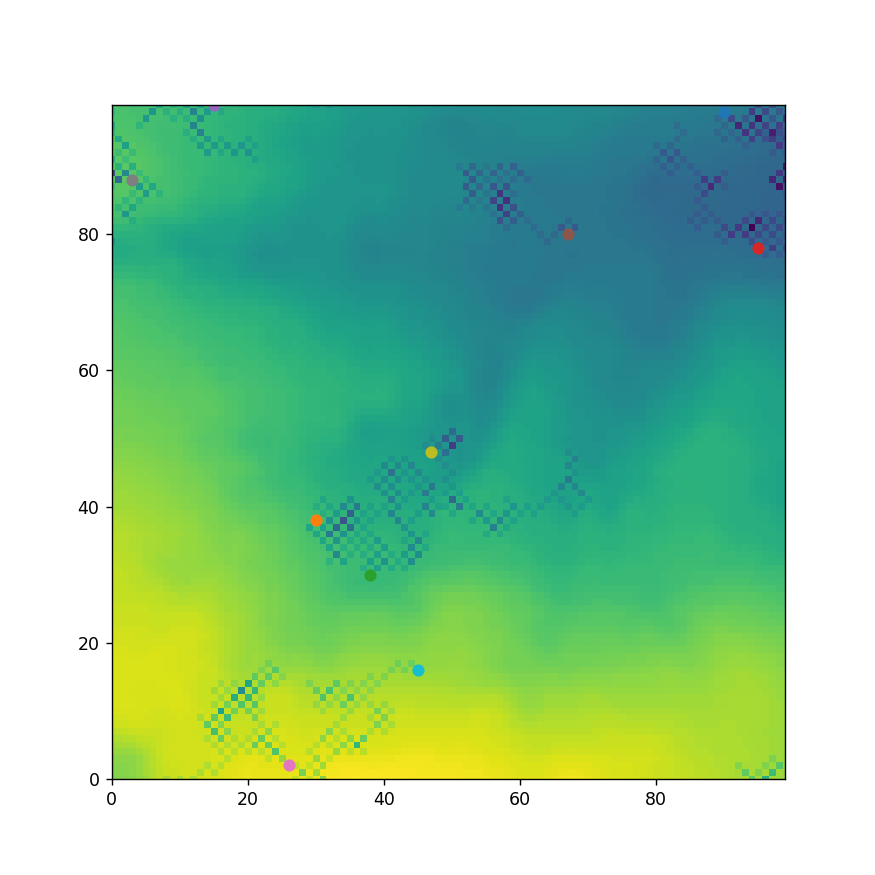

In [2]:
%matplotlib notebook

# -*- coding: utf-8 -*-
"""
Created on Wed Mar  6 20:16:39 2019

@author: Orkhan Hajiyev (gy17oh)

The script shows the results of Part 8 instructions.

Part 6 enhacemnet was added to the script. The modified environment state
is written to the new file.

"""

"""
===============================================================================
===============================================================================
PART 6 REQUIRED IMPROVEMENTS

So, that's kind of cool. We've now got agents that interact with our 
environment. If you've got some time, have a think about implementing the 
following:

Using the lecture notes, can you write out the environment as a file at the 
end?

Can you make a second file that writes out the total amount stored by all the 
agents on a line? Can you get the model to append the data to the file, rather 
than clearing it each time it runs?

Can you override __str__(self) in the agents, as mentioned in the lecture on 
classes, so that they display this information information about their location 
and stores when printed?

Can you get the agents to wander around the full environment by finding out the 
size of environment inside the agents, and using the size when you randomize 
their starting locations and deal with the boundary conditions?

At the moment, the agents only eat 10 units at a time. This will leave a few 
units in each area, even if intensly grazed. Can you get them to eat the last 
few bits, if there's less than 10 left, without leaving negative values?

Can you get the agents to sick up their store in a location if they've been 
greedy guts and eaten more than 100 units? (note that when you add or subtract 
from the map, the colours will re-scale).

===============================================================================
===============================================================================
                                            
PART 7 REQUIRED IMPROVEMENTS

All the major model parameters are in model.py, as we discussed earlier. 
Can you get the model so that it reads these from the command line using argv, 
the command line arguments we talked about in the lecture? i.e., so it runs 
like this:

python model.py 200 20 30

Where, for example, 200 is the number of agents, 20 is the number of 
iterations, and 30 is the neighbourhood. Remember that you may need to catch 
exceptions when the user types something that can't be cast to an int.

If you can do this, can you write a python program that uses subprocess.call 
to run the model with a variety of results using ranges to set those parameters 
(remember to leave some defaults)? For example, can you get it to run stepping 
up agent numbers by ten each time it runs, and append the total amount stored 
to a file for each run? This is called "parameter sweeping", and it isn't 
unusual to have a model running class that runs a model multiple times to 
explore how it responds to parameter variations. You might want an argv 
variable that also turns off the visual output for multiple runs (if you want 
to make this a boolean, note that all non-empty strings, even "False" are true. 
For the solution, see this StackOverflow answer).

===============================================================================
===============================================================================
"""


#==============================================================================
# Import modules

import random
import operator
import matplotlib.pyplot
import matplotlib.animation
import agentframework_part8 as agentframework
import csv

# End of Import modules
#==============================================================================


#==============================================================================
# Function definitions



#def distance_between(agents_row_a, agents_row_b):
#    return (((agents_row_a.y - agents_row_b.y)**2) + 
#        ((agents_row_a.x - agents_row_b.x)**2))**0.5

def draw_environment(agents, environment, num_of_agents):
    matplotlib.pyplot.xlim(0, 99)
    matplotlib.pyplot.ylim(0, 99)
    matplotlib.pyplot.imshow(environment)
    for i in range(num_of_agents):
        matplotlib.pyplot.scatter(agents[i].x,agents[i].y)
    matplotlib.pyplot.show()
    

def update(frame_number):
    
    fig.clear()   
    
    # Move and eat the agents.
    for i in range(num_of_agents):
            agents[i].move() 
            agents[i].eat()
            agents[i].share_with_neighbours(neighbourhood) 
        
    matplotlib.pyplot.xlim(0, 99)
    matplotlib.pyplot.ylim(0, 99)    
    matplotlib.pyplot.imshow(environment)
    for i in range(num_of_agents):
        matplotlib.pyplot.scatter(agents[i].x,agents[i].y)
        #print(agents[i].x,agents[i].y)

# End of Function definitions
#==============================================================================

##==============================================================================
## Start of Main function
#def main():
#    
#    #==========================================================================
#    # Create variables
#    
#    num_of_agents = 10 # number of agents
#    num_of_iterations = 100 # number of iterations
#    neighbourhood = 20
#    environment = [] # empty list of environment variable 
#    agents = [] # empty list of Agent objects
#    file_input = open("in.txt") # read the input file
#    
#    # End of Create variables
#    #==========================================================================
#
#    # Setup figure parameters
#    fig = matplotlib.pyplot.figure(figsize=(7, 7))
#    ax = fig.add_axes([0, 0, 1, 1])
#    
#    # Read input file values and assign into environment variable
#    for data_row in file_input:
#        row_list = []
#        for single_value in data_row.split(","):
#            row_list.append(int(single_value))
#        environment.append(row_list)
#    
#    # Make the agents.
#    for i in range(num_of_agents):
#        agents.append(agentframework.Agent(environment, agents))
#    
#    # Print the state of environment and agents before changes
#    #draw_environment(agents, environment, num_of_agents)
#    
##     Move and eat the agents.
##    for j in range(num_of_iterations):
##        random.shuffle(agents)
##        for i in range(num_of_agents):
##            agents[i].move()
##            agents[i].eat()
##            agents[i].share_with_neighbours(neighbourhood)  
#    def update(frame_number):
#    
#        fig.clear()
#        
#        # Move and eat the agents.
#    #    for j in range(num_of_iterations):
#    #        random.shuffle(agents)
#        for i in range(num_of_agents):
#            agents[i].move()
#            #agents[i].eat()
#            #agents[i].share_with_neighbours(neighbourhood)  
#                
#        for i in range(num_of_agents):
#            matplotlib.pyplot.scatter(agents[i].x,agents[i].y)
#            print(agents[i].x,agents[i].y)
#            
#            
#            
#    # Print the state of environment and agents after changes
#    #draw_environment(agents, environment, num_of_agents)
#
#    animation = matplotlib.animation.FuncAnimation(fig, update, interval=1)
#    
#    matplotlib.pyplot.show()
#    

#             
## End of Main function
##==============================================================================
#        
#        




#==========================================================================
# Create variables

num_of_agents = 10 # number of agents
num_of_iterations = 1000 # number of iterations
neighbourhood = 20
environment = [] # empty list of environment variable 
agents = [] # empty list of Agent objects
file_input = open("in.txt") # read the input file

# End of Create variables
#==========================================================================

# Setup figure parameters
fig = matplotlib.pyplot.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1])

#ax.set_autoscale_on(False)   

# Read input file values and assign into environment variable
for data_row in file_input:
    row_list = []
    for single_value in data_row.split(","):
        row_list.append(int(single_value))
    environment.append(row_list)

# Make the agents.
for i in range(num_of_agents):
    agents.append(agentframework.Agent(environment, agents))
        
animation = matplotlib.animation.FuncAnimation(fig, update, 
                                               interval=1, repeat=False, 
                                               frames=num_of_iterations)
matplotlib.pyplot.show()

##Write the new state  of environemnt to the file
#with open('out.txt', 'w') as file_output:
#    for env_row in environment:
#        file_output.write(','.join(str(env_value) for env_value in 
#                                   env_row) + '\n')

## Main part of the script
#if __name__ == "__main__":
#    main()        
